In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:

kdd = pd.read_csv("kdd_FGM.csv")
nsl = pd.read_csv("nsl_FGM.csv")
ids = pd.read_csv("ids_FGM.csv")
ciciot = pd.read_csv("ciciot_FGM.csv")
kitsune = pd.read_csv("kitsune_FGM.csv")
credit = pd.read_csv("credit_FGM.csv")
ecg = pd.read_csv("ecg_FGM.csv")

in_kdd = kdd.loc[kdd['r1']==0.,'n1'].values[0]
in_ids = ids.loc[ids['r1']==0.,'n1'].values[0]
in_kitsune = kitsune.loc[kitsune['r1']==0.,'n1'].values[0]
in_ciciot = ciciot.loc[ciciot['r1']==0.,'n1'].values[0]
in_credit = credit.loc[credit['r1']==0.,'n1'].values[0]
in_ecg = ecg.loc[ecg['r1']==0.,'n1'].values[0]


kdd['ratio'] = kdd['n2']*(1-kdd['r2'])/in_kdd
ids['ratio'] = ids['n2']*(1-ids['r2'])/in_ids
ciciot['ratio'] = ciciot['n2']*(1-ciciot['r2'])/in_ciciot
kitsune['ratio'] = kitsune['n2']*(1-kitsune['r2'])/in_kitsune
credit['ratio'] = credit['n2']*(1-credit['r2'])/in_credit
nsl['ratio'] = nsl['n2']*(1-nsl['r2'])/in_kdd
ecg['ratio'] = ecg['n2']*(1-ecg['r2'])/in_ecg

kdd['name'] ='kdd'
nsl['name'] ='nsl'
credit['name'] ='credit'
ids['name'] = 'ids'
ciciot['name'] ='ciciot'
kitsune['name'] = 'kitsune'
ecg['name'] = 'ecg'
data = pd.concat([kdd, ids, ciciot,kitsune, credit, ecg], ignore_index=True)

In [3]:
#data = data[data['name']!='ids']
data = data[data['metric']=='sdc']
data.rename(columns={'name': 'dataset'}, inplace=True)
eps = 0.0000000000000001
data['improvement'] = 100*(data.r1-data.r2)/(data.r1+eps)
data['id'] = range(len(data))
data = data.sort_values(by=['dataset', 'r1'])
data.loc[data['dataset']=='kdd', 'id'] = range(11)
data.loc[data['dataset']=='ciciot', 'id'] = range(11)
data.loc[data['dataset']=='ids', 'id'] = range(11)
data.loc[data['dataset']=='kitsune', 'id'] = range(11)
data.loc[data['dataset']=='credit', 'id'] = range(11)
data.loc[data['dataset']=='ecg', 'id'] = range(11)
data.head(40)

,metric,n1,n2,r1,r2,ratio,dataset,improvement,id
22,sdc,127298,98690,0.000000,0.000000,0.775267,ciciot,0.000000,0
23,sdc,131650,102644,0.033057,0.026548,0.784922,ciciot,19.690871,1
24,sdc,136002,104325,0.063999,0.051100,0.777656,ciciot,20.155188,2
25,sdc,140354,107738,0.093022,0.074774,0.783060,ciciot,19.616817,3
26,sdc,144706,112033,0.120299,0.098328,0.793547,ciciot,18.263578,4
27,sdc,149058,113789,0.145983,0.117929,0.788465,ciciot,19.217689,5
28,sdc,153410,116463,0.170211,0.139658,0.787114,ciciot,17.949803,6
29,sdc,157762,120582,0.193101,0.160007,0.795676,ciciot,17.138027,7
30,sdc,162114,126453,0.214762,0.180628,0.813933,ciciot,15.893875,8
31,sdc,166466,126208,0.235291,0.197539,0.795590,ciciot,16.044923,9


In [7]:
df_1 = pd.read_csv("performances_kdd_AE.csv")
df_2 = pd.read_csv("performances_kdd_OC-SVM.csv")
df_3 = pd.read_csv("performances_kdd_LOF.csv")
df_4 = pd.read_csv("performances_kdd_IF.csv")
df_5 = pd.read_csv("performances_kdd_svdd.csv")
df_6 = pd.read_csv("performances_kdd_dsebm.csv")
df_7 = pd.read_csv("performances_kdd_alad.csv")
df_8 = pd.read_csv("performances_kdd_dagmm.csv")
df_kdd = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis=0, ignore_index=True)

In [8]:
df_1 = pd.read_csv("performances_kitsune_AE.csv")
df_2 = pd.read_csv("performances_kitsune_OC-SVM.csv")
df_3 = pd.read_csv("performances_kitsune_LOF.csv")
df_4 = pd.read_csv("performances_kitsune_IF.csv")
df_5 = pd.read_csv("performances_kitsune_svdd.csv")
#df_6 = pd.read_csv("performances_kitsune_dsebm.csv")
#df_7 = pd.read_csv("performances_kitsune_alad.csv")
#df_8 = pd.read_csv("performances_kitsune_dagmm.csv")
df_kitsune = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0, ignore_index=True)

In [9]:
df_1 = pd.read_csv("performances_ciciot_AE.csv")
df_2 = pd.read_csv("performances_ciciot_OC-SVM.csv")
df_3 = pd.read_csv("performances_ciciot_LOF.csv")
df_4 = pd.read_csv("performances_ciciot_IF.csv")
df_5 = pd.read_csv("performances_ciciot_svdd.csv")
#df_6 = pd.read_csv("performances_ciciot_dsebm.csv")
#df_7 = pd.read_csv("performances_ciciot_alad.csv")
#df_8 = pd.read_csv("performances_ciciot_dagmm.csv")
df_ciciot = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0, ignore_index=True)

In [10]:
df_1 = pd.read_csv("performances_ids_AE.csv")
df_2 = pd.read_csv("performances_ids_OC-SVM.csv")
df_3 = pd.read_csv("performances_ids_LOF.csv")
df_4 = pd.read_csv("performances_ids_IF.csv")
df_5 = pd.read_csv("performances_ids_svdd.csv")
df_6 = pd.read_csv("performances_ids_dsebm.csv")
#df_7 = pd.read_csv("performances_ids_alad.csv")
#df_8 = pd.read_csv("performances_ids_dagmm.csv")
df_ids = pd.concat([df_1, df_2,  df_3, df_4, df_5, df_6], axis=0, ignore_index=True)

In [11]:
df_1 = pd.read_csv("performances_ecg_AE.csv")
df_2 = pd.read_csv("performances_ecg_OC-SVM.csv")
df_3 = pd.read_csv("performances_ecg_LOF.csv")
df_4 = pd.read_csv("performances_ecg_IF.csv")
df_5 = pd.read_csv("performances_ecg_svdd.csv")
df_6 = pd.read_csv("performances_ecg_dsebm.csv")
df_7 = pd.read_csv("performances_ecg_alad.csv")
df_8 = pd.read_csv("performances_ecg_dagmm.csv")
df_ecg = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis=0, ignore_index=True)

In [12]:
df_1 = pd.read_csv("performances_credit_AE.csv")
df_2 = pd.read_csv("performances_credit_OC-SVM.csv")
df_3 = pd.read_csv("performances_credit_LOF.csv")
df_4 = pd.read_csv("performances_credit_IF.csv")
df_5 = pd.read_csv("performances_credit_svdd.csv")
df_6 = pd.read_csv("performances_credit_dsebm.csv")
#df_7 = pd.read_csv("performances_credit_alad.csv")
#df_8 = pd.read_csv("performances_credit_dagmm.csv")
df_credit = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], axis=0, ignore_index=True)

In [13]:
df_perf = pd.concat([df_kdd, df_kitsune, df_ciciot, df_ecg, df_ids, df_credit], axis=0, ignore_index=True)
df_perf = df_perf.sort_values(by='dataset')

In [14]:
df_perf[df_perf["model"]=="Bopeto_svdd"].head()

,dataset,contamination,model,accuracy,precision,recall,f1
413,ciciot,0.254774,Bopeto_svdd,0.540319,0.701072,0.538368,0.609041
411,ciciot,0.235291,Bopeto_svdd,0.518502,0.682007,0.517125,0.588230
409,ciciot,0.214762,Bopeto_svdd,0.480435,0.649039,0.476358,0.549450
407,ciciot,0.193101,Bopeto_svdd,0.449543,0.621246,0.441480,0.516159
405,ciciot,0.170211,Bopeto_svdd,0.551853,0.710452,0.550530,0.620350


In [15]:
sub_df = df_perf[['dataset', 'contamination']].copy()
sub_df['contamination'] = sub_df['contamination']*100
sub_df = sub_df.drop_duplicates().groupby("dataset")['contamination'].apply(lambda x: sorted(x)).to_dict()

keys = list(sub_df.keys())
for key in keys:
    sub_df[key] = np.diff(sub_df[key])
contaminations = {}
size = len(sub_df["kitsune"])
for i in range(size):
    contaminations[i] = [sub_df["ciciot"][i], sub_df["credit"][i], sub_df["ecg"][i], 
           sub_df["ids"][i], sub_df["kdd"][i], sub_df["kitsune"][i]]
 

/tmp/ipykernel_99392/785806113.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(keys, rotation=90)


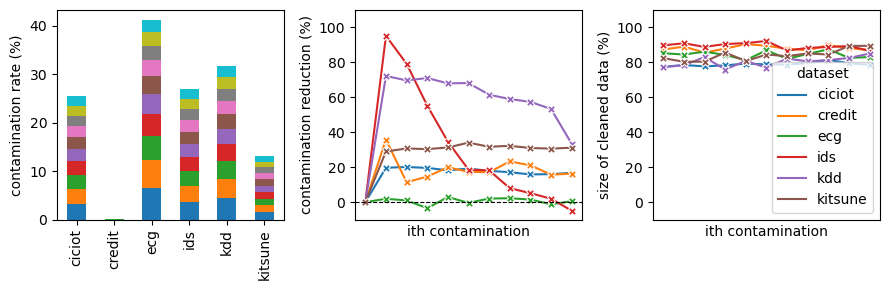

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(9, 3))
cond = data['dataset']=='ciciot'
width = 0.5
bottom = np.zeros(6) 
for boolean, weight_count in contaminations.items():
    p = ax[0].bar(keys, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax[0].set_ylabel('contamination rate (%)')
ax[0].legend().remove()
ax[0].set_xticklabels(keys, rotation=90)


sns.lineplot(data=data, x=data.id, y=data.improvement, hue='dataset', ax=ax[1], marker='X')
#ax.set_title(f'{subplot}'.upper())
ax[1].set_xlabel('ith contamination') 
ax[2].set_ylabel('size of cleaned data (%)')
sns.lineplot(data=data, x=data.id, y=100*data.ratio, hue='dataset', ax=ax[2], marker='X')
ax[2].set_xlabel('ith contamination') 
ax[1].set_ylabel('contamination reduction (%)')
ax[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax[1].legend().remove()
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[1].set_ylim(-10, 110)
ax[2].set_ylim(-10, 110)
plt.tight_layout()
plt.savefig("cleaning_ratio.pdf")
plt.show()

/tmp/ipykernel_99392/491522319.py:35: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


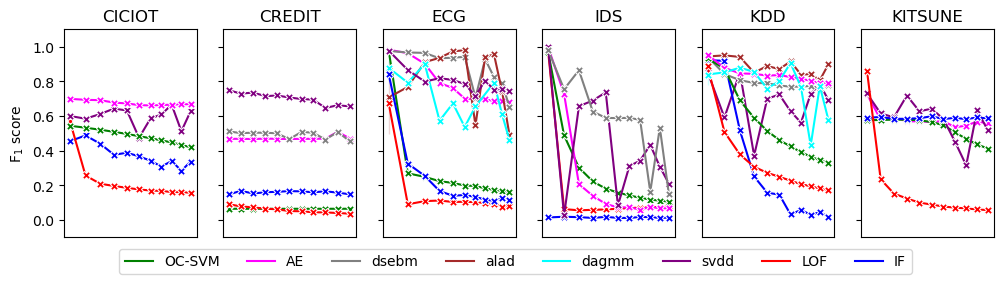

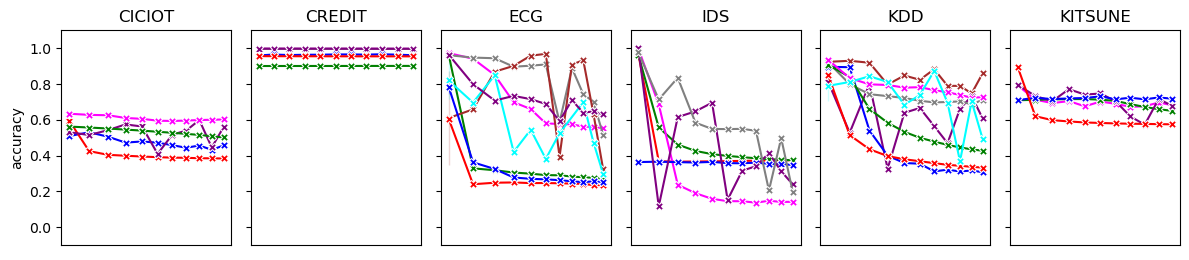

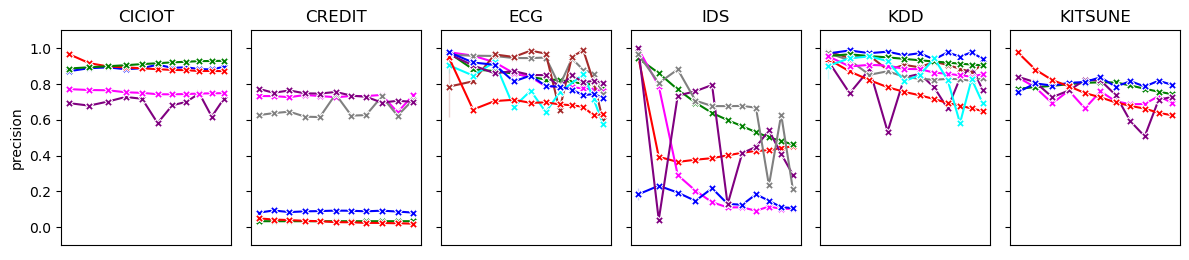

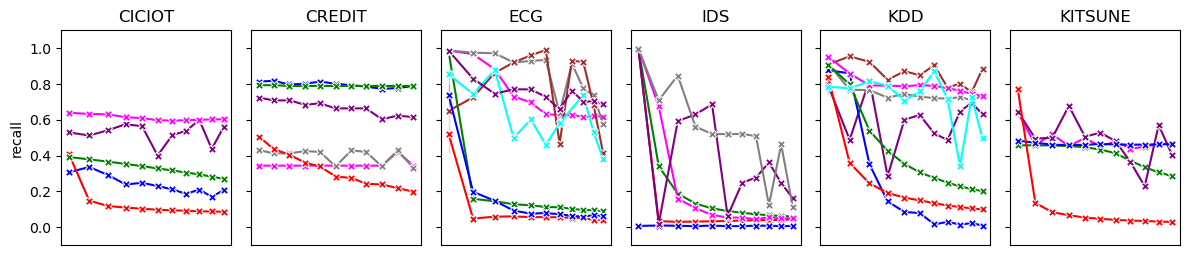

In [17]:
metrics = ["f1", "accuracy", "precision", "recall"]
color_palette_ = {
    "IF": "blue",
    "LOF": "red",
    "OC-SVM": "green",
    "AE": "magenta",
    "dsebm": "gray",
    "alad": "brown",
    "svdd": "purple",
    "dagmm": "cyan" 
}
for metric in metrics:
    degration = df_perf[~df_perf['model'].str.contains('Bopeto')]
    fig, axes = plt.subplots(ncols=6, figsize=(12, 2.7), sharey=True)
    for i, (ax, (subplot, df_group)) in enumerate(zip(axes, degration.groupby('dataset'))):
        sns.lineplot(data=df_group, x=df_group.contamination, y=metric, hue='model', ax=ax, marker='X', palette=color_palette_)
        ax.set_title(f'{subplot}'.upper())
        ax.set_xlabel('')
        ax.set_xticks([])
        if metric=="f1":
            ax.set_ylabel(r'F$_1$ score')
        else:
            ax.set_ylabel(metric)
        ax.set_ylim(-0.1, 1.1)
        if i != 2 or metric!="f1":
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
                    label.set_font('bold')
            ax.legend(loc='lower center', bbox_to_anchor=(1., -0.21), ncol=8)
            #ax.legend().get_frame().set_linewidth(1)
    plt.tight_layout()
    plt.savefig("degration_"+metric+".pdf")
    plt.show()

In [18]:
degration_perf = df_perf[~df_perf['model'].str.contains('Bopeto')]
degration_perf.groupby('dataset')['accuracy'].agg(['mean', 'std'])

,mean,std
dataset,,
ciciot,0.515763,0.075970
credit,0.968318,0.034866
ecg,0.583572,0.265089
ids,0.460943,0.255932
kdd,0.663395,0.200887
kitsune,0.695142,0.069678


In [19]:
degration_perf.groupby('model')['f1'].agg(['mean', 'std'])

,mean,std
model,,
AE,0.613412,0.247525
IF,0.292326,0.258831
LOF,0.220420,0.252135
OC-SVM,0.385683,0.262829
alad,0.847699,0.143959
dagmm,0.740404,0.148326
dsebm,0.701401,0.212181
svdd,0.648597,0.187937


In [20]:
degration_perf.groupby('model')['precision'].agg(['mean', 'std'])

,mean,std
model,,
AE,0.715371,0.234660
IF,0.622614,0.360723
LOF,0.615458,0.310069
OC-SVM,0.697381,0.320848
alad,0.887566,0.113400
dagmm,0.814189,0.120477
dsebm,0.775600,0.170964
svdd,0.730750,0.173223


In [21]:
degration_perf.groupby('model')['recall'].agg(['mean', 'std'])

,mean,std
model,,
AE,0.549726,0.258608
IF,0.333134,0.306565
LOF,0.211829,0.244442
OC-SVM,0.418349,0.286492
alad,0.814598,0.165451
dagmm,0.682540,0.164903
dsebm,0.650693,0.239811
svdd,0.589443,0.198809


In [22]:
df_perf[df_perf['contamination']==0].head(10)

,dataset,contamination,model,accuracy,precision,recall,f1
370,ciciot,0.0,Bopeto_IF,0.615739,0.826745,0.534159,0.649000
369,ciciot,0.0,IF,0.511646,0.883257,0.306170,0.454718
368,ciciot,0.0,IF,0.506937,0.860755,0.308533,0.454245
393,ciciot,0.0,Bopeto_svdd,0.643638,0.788447,0.634383,0.703074
392,ciciot,0.0,svdd,0.529081,0.691702,0.526651,0.597997
391,ciciot,0.0,svdd,0.533337,0.694765,0.532078,0.602635
324,ciciot,0.0,Bopeto_OC-SVM,0.648063,0.826091,0.596370,0.692681
323,ciciot,0.0,OC-SVM,0.562402,0.886703,0.392123,0.543775
322,ciciot,0.0,OC-SVM,0.562402,0.886703,0.392123,0.543775
301,ciciot,0.0,Bopeto_AE,0.683622,0.804140,0.693103,0.744504


In [24]:
def sort_group(group):
    return group.sort_values(by='dataset')

In [25]:
df_perf.head()

,dataset,contamination,model,accuracy,precision,recall,f1
359,ciciot,0.170211,Bopeto_LOF,0.431462,0.910949,0.160861,0.273437
383,ciciot,0.193101,IF,0.444084,0.893647,0.186285,0.308303
382,ciciot,0.170211,Bopeto_IF,0.579734,0.852293,0.445243,0.584921
381,ciciot,0.170211,IF,0.458357,0.890453,0.211609,0.341956
380,ciciot,0.145983,Bopeto_IF,0.589249,0.845171,0.468150,0.602543


In [26]:
models = ["AE", "OC-SVM", "LOF", "IF", "svdd", "alad", "dsebm", "dagmm"]
names = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KITSUNE"]

In [27]:
def get_diff(model, dataset):
    n_db = pd.DataFrame([])
    ds = df_perf[(df_perf["dataset"]==dataset) & (df_perf["model"]==model)]
    ds_b = df_perf[(df_perf["dataset"]==dataset) & (df_perf["model"]=="Bopeto_"+model)]
    contamination = np.unique(ds["contamination"].values)
    diff_acc = []
    diff_f1 = []
    diff_prec = []
    diff_rec = []
    for c in contamination:
        acc = ds_b.loc[ds_b['contamination']==c, "accuracy"].values[0]
        acc -= ds.loc[ds['contamination']==c, "accuracy"].values[0]
        diff_acc.append(acc)
        f1 = ds_b.loc[ds_b['contamination']==c, "f1"].values[0]
        f1 -= ds.loc[ds['contamination']==c, "f1"].values[0]
        diff_f1.append(f1)
        prec = ds_b.loc[ds_b['contamination']==c, "precision"].values[0]
        prec -= ds.loc[ds['contamination']==c, "precision"].values[0]
        diff_prec.append(prec)
        rec = ds_b.loc[ds_b['contamination']==c, "recall"].values[0]
        rec -= ds.loc[ds['contamination']==c, "recall"].values[0]
        diff_rec.append(rec)
    n_db["accuracy"] = diff_acc
    n_db["precision"] = diff_prec
    n_db["f1"] = diff_f1
    n_db["recall"] = diff_rec
    n_db["contamination"] = contamination
    n_db["dataset"]=dataset
    n_db["model"] = model
    n_db["id"]=range(len(contamination))
    return n_db
    

In [28]:
get_diff("svdd", "ecg")

,accuracy,precision,f1,recall,contamination,dataset,model,id
0,-0.009052,-0.001522,-0.005866,-0.010267,0.000000,ecg,svdd,0
1,-0.058040,-0.033715,-0.040447,-0.045859,0.065217,ecg,svdd,1
2,0.160277,0.072715,0.114667,0.149213,0.123066,ecg,svdd,2
3,-0.105964,-0.062939,-0.077876,-0.088296,0.173625,ecg,svdd,3
4,-0.031416,-0.012334,-0.024219,-0.033539,0.219161,ecg,svdd,4
5,0.020234,0.004973,0.016647,0.025325,0.259501,ecg,svdd,5
6,0.075080,0.042766,0.057072,0.067077,0.296275,ecg,svdd,6
7,-0.107029,-0.057612,-0.080883,-0.097878,0.329209,ecg,svdd,7
8,-0.024494,-0.013025,-0.019040,-0.023272,0.359527,ecg,svdd,8
9,-0.029819,-0.018465,-0.022168,-0.024641,0.386922,ecg,svdd,9


In [29]:
difference = pd.DataFrame([])
for d_name in names:
    for m_name in models:
        difference = pd.concat([difference, get_diff(m_name, d_name.lower())], ignore_index=True)

In [30]:
difference.tail()

,accuracy,precision,f1,recall,contamination,dataset,model,id
412,-0.050074,-0.059321,-0.105145,-0.112858,0.083032,kitsune,svdd,6
413,0.143886,0.244629,0.217062,0.191817,0.095550,kitsune,svdd,7
414,0.196149,0.335829,0.364008,0.339927,0.107730,kitsune,svdd,8
415,-0.031435,0.026619,-0.103706,-0.157467,0.119587,kitsune,svdd,9
416,0.087952,0.115299,0.155563,0.158575,0.131133,kitsune,svdd,10


/tmp/ipykernel_99392/3773657058.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


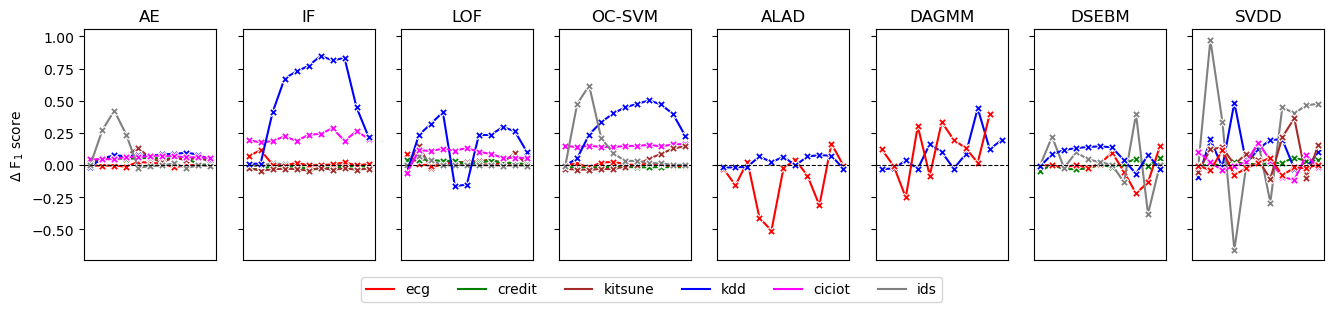

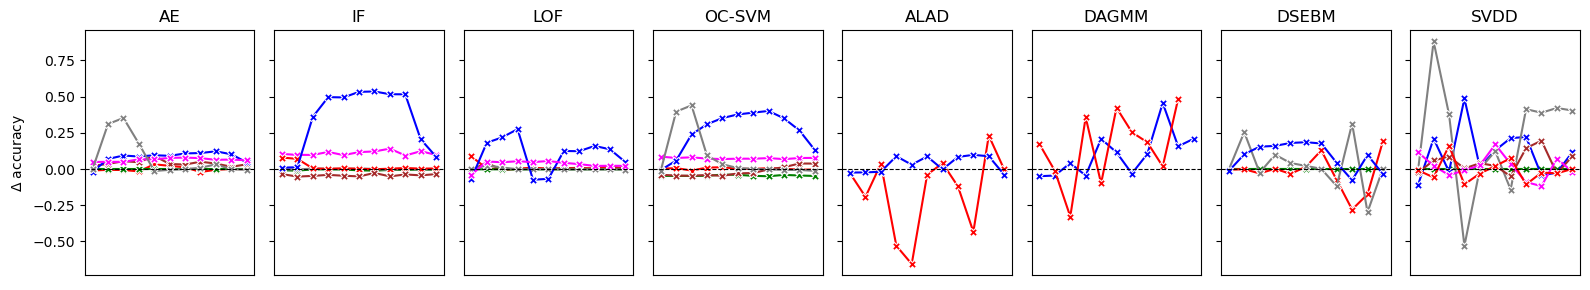

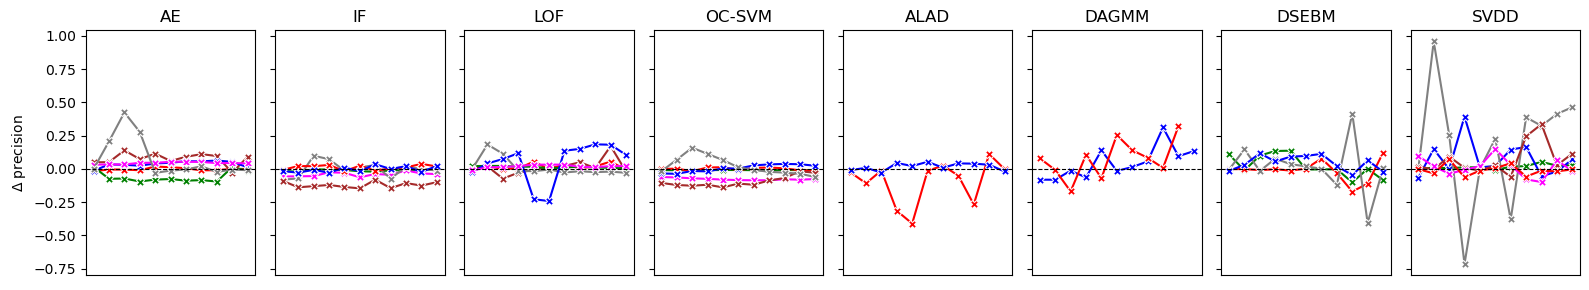

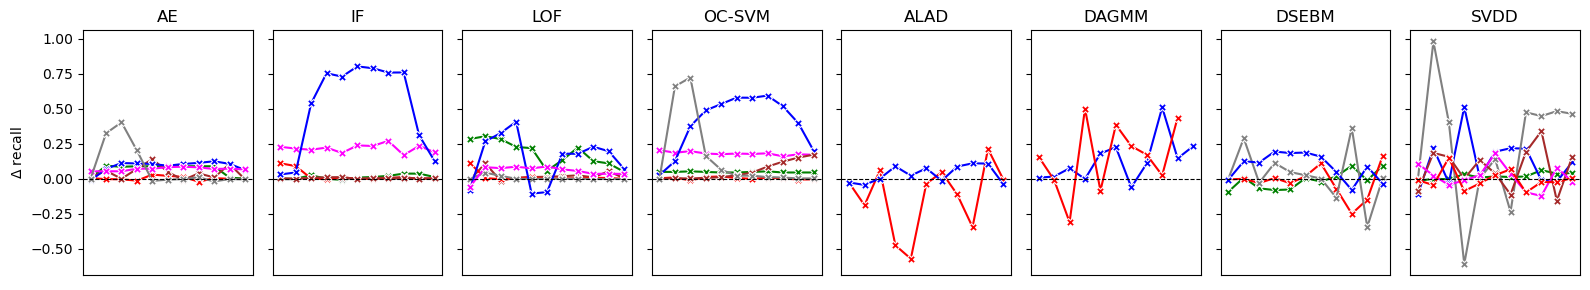

In [31]:
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'x', '+', '*']
color_palette = {
    "kdd": "blue",
    "ecg": "red",
    "credit": "green",
    "ciciot": "magenta",
    "ids": "gray",
    "kitsune": "brown"  
}
for metric in metrics:
    robustness = difference.sort_values(by='contamination')
    fig, axes = plt.subplots(ncols=8, figsize=(16, 3), sharey=True)
    for i, (ax, (subplot, df_group)) in enumerate(zip(axes, robustness.groupby('model'))):
        sns.lineplot(data=df_group, x=df_group.id, y=metric, hue='dataset', ax=ax, marker='X', palette=color_palette)
        ax.set_title(f'{subplot}'.upper())
        ax.set_xlabel('')
        ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
        ax.set_xticks([])
        if metric=="f1":
            ax.set_ylabel(r'$\Delta$ F$_1$ score')
        else:    
            ax.set_ylabel(r'$\Delta$ {}'.format(metric))

        if i != 0 or metric!="f1":
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
                    label.set_font('bold')
                ax.legend(loc='lower center', bbox_to_anchor=(4.3, -0.21), ncol=6)
    plt.tight_layout()
    plt.savefig(metric+"_difference.pdf")
    plt.show()

In [ ]:
df_perf.groupby(['model', 'dataset'])['precision'].agg(['mean', 'std'])

In [ ]:
for metric in metrics:
    for model in models:
        palette ={'Bopeto_'+model: 'blue', model: 'red'}
        robustness = df_perf[df_perf['model'].str.contains(model)]
        robustness = robustness.sort_values(by='dataset')
        fig, axes = plt.subplots(ncols=6, figsize=(9, 2), sharey=True)
        for i, (ax, (subplot, df_group)) in enumerate(zip(axes, robustness.groupby('dataset'))):
            sns.lineplot(data=df_group, x=df_group.contamination, y=metric, hue='model', ax=ax, marker='X', palette=palette)
            ax.set_title(f'{subplot}'.upper())
            ax.set_xlabel('')
            if metric=="f1":
                ax.set_ylabel(r'F$_1$ score')
            else:
                ax.set_ylabel(metric)
            ax.set_ylim(-0.1, 1.1)

            if i != 0:
                ax.legend().remove()
            else:
                ax.legend(loc='lower center', bbox_to_anchor=(2.5, -0.35), ncol=2)
        plt.tight_layout()
        plt.savefig(model+"_"+metric+"_robustness.pdf")
        plt.show()

In [ ]:
df_group

In [ ]:
dd_ecg = np.load("../data/ecg.npz", allow_pickle=True) 
dd_credit = np.load("../data/credit.npz", allow_pickle=True) 
data1_ecg = pd.DataFrame(dd_ecg['ecg'])
data1_credit = pd.DataFrame(dd_credit['credit'])

In [ ]:
np.unique(data1_credit.values[:, -1])

In [ ]:
data1_kdd = pd.read_csv("kdd.csv")
data1_ids = pd.read_csv("ids.csv")
data1_ciciot = pd.read_csv("ciciot.csv")
data_kitsune = pd.read_csv("kitsune.csv")

In [ ]:

datasets = [data1_ciciot, data1_credit, data1_ecg, data1_ids, data1_kdd, data_kitsune]
pca = PCA(n_components=2)
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
replacement_dict = {
    0: 'in',
    1: 'out',
    2: 'synthetic'
}
for i, xy in enumerate(datasets):
    
    x, y = xy.values[:, :-1], xy.values[:, -1]
    reduced_data = pca.fit_transform(x)
    df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    df_pca['target'] = y
    df_pca['target'] = df_pca['target'].replace(replacement_dict)
    df_pca = df_pca[df_pca['target']!='synthetic']

    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', ax=axs[i], palette={'in':'blue', 'out':'red', 'synthetic':'green'}, legend=(i==0))
    axs[i].set_title(names[i])
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    if i == 0:
        axs[i].legend(title='')
    else:
        axs[i].legend([],[], frameon=False)

plt.tight_layout()
plt.savefig("synthetic.png")
plt.show()


In [ ]:
def sdc(dynamics):
    return np.std(np.diff(dynamics, axis=1), axis=1)

In [ ]:
kdd_1 = np.loadtxt("kdd_FGM_sdc_ae_rate_0.18821442994855225.csv", delimiter=',')
ids_1 = np.loadtxt("ids_FGM_sdc_ae_rate_0.15585998801128825.csv", delimiter=',')
credit_1 = np.loadtxt("credit_FGM_sdc_ae_rate_0.0012223312434517968.csv", delimiter=',')
ecg_1 = np.loadtxt("ecg_FGM_sdc_ae_rate_0.21916092673763307.csv", delimiter=',')
ciciot_1 = np.loadtxt("ciciot_FGM_sdc_ae_rate_0.19310100024086915.csv", delimiter=',')
kitsune_1 = np.loadtxt("kitsune_FGM_sdc_ae_rate_0.0701628076642476.csv", delimiter=',')

In [ ]:
x_kdd, y_kdd = kdd_1[:, :-1], kdd_1[:, -1]
x_ids, y_ids = ids_1[:, :-1], ids_1[:, -1]
x_ciciot, y_ciciot = ciciot_1[:, :-1], ciciot_1[:, -1]
x_kitsune, y_kitsune = kitsune_1[:, :-1], kitsune_1[:, -1]
x_credit, y_credit = credit_1[:, :-1], credit_1[:, -1]
x_ecg, y_ecg = ecg_1[:, :-1], ecg_1[:, -1]

In [ ]:
m = 'score'
mac_kdd = sdc(x_kdd)
mac_ids = sdc(x_ids)
mac_ciciot = sdc(x_ciciot)
mac_kitsune = sdc(x_kitsune)
mac_credit = sdc(x_credit)
mac_ecg = sdc(x_ecg)

In [ ]:
mapping = {0: 'in', 1: 'out', 2:'synthetic'}
def clean(dynamics, target, n=1000):
    detector = IsolationForest(n_estimators=50, random_state=42)
    df = pd.DataFrame(data = dynamics, columns=[m])
    df['class'] = target
    df['class'] = df['class'].replace(mapping)
    y_pred = detector.fit_predict(dynamics.reshape(-1, 1))
    anomaly_scores = detector.decision_function(dynamics.reshape(-1, 1))
    out = anomaly_scores[y_pred==-1]
    in_ = anomaly_scores[y_pred==1]
    threshold = (np.max(out)+np.min(in_))/2
    threshold = np.percentile(out, np.random.randint(60, 70, 1)[0])
    y_pred = anomaly_scores >= threshold

    df[m] = anomaly_scores
    y = y_pred==1
    sample = df.sample(n=n)
    selected = df.index.isin(sample.index)
    cleaned = df[y & selected].copy()
    return sample, cleaned, threshold 

In [ ]:
all_data = [clean(mac_ciciot, y_ciciot), clean(mac_credit, y_credit), 
            clean(mac_ecg, y_ecg), clean(mac_ids, y_ids), 
            clean(mac_kdd, y_kdd), clean(mac_kitsune, y_kitsune)]


In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(9, 3))
datasets = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KISTUNE"]
palette = {"out":"red", "synthetic":"green", "in":"blue"}
for i, df in enumerate(all_data):
    for j in range(1):
        d = df[j]
        d = d.sort_index()
        ax = axes[0, i]
        sns.scatterplot(data=d, x=d.index, y=m, hue='class', ax=ax, palette=palette, s=10)
        ax.axhline(y=df[2], color='r', linestyle='-')
        ax.set_ylabel(None)
        if j==0:
            ax.set_title(datasets[i])
        if i!=0 or j!=1:
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
        
        
        ax.set_xticks([])
        ax = axes[1, i]
        sns.kdeplot(data= d, x='score', hue='class', fill=True, ax=ax, palette=palette)
        ax.legend().remove()
        ax.set_xticks([])
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        if i!=0:
            axes[0, i].set_ylabel('')
            axes[1, i].set_ylabel('')
        else:
            pass
            #axes[1, 0].set_ylabel('density')
        ax.set_ylim(0, 16)
plt.tight_layout()
plt.savefig("dynamics_space.png")
plt.show()

In [ ]:
d

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)
thresholds = [0.008, 0.015, 0.02]
for i, df in enumerate([df_kdd.sample(n=1000), df_ciciot.sample(n=1000), df_kitsune.sample(n=1000)]):
    ax = axes[i]
    sns.scatterplot(data=df, x=df.index, y=m, hue='class', ax=ax, palette=palette)
    ax.set_title(datasets[i])
    ax.axhline(y=thresholds[i], color='r', linestyle='-')
    if i!=0:
        ax.legend().remove()
    ax.set_xticks([])
plt.tight_layout()
plt.savefig("dynamics_space_threshold.png")
plt.show()


    

In [ ]:
x_kdd.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: 6 sequence matrices with three categories
num_matrices = 6
num_sequences = 100
sequence_length = 50
num_categories = 3

sequences = [x_ciciot, x_credit, x_ecg, x_ids, x_kdd, x_kitsune]
labels = [y_ciciot, y_credit, y_ecg, y_ids, y_kdd, y_kitsune]
colors = ['blue', 'red', 'green']
names = ['in', 'out', 'synthetic']
databases = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KITSUNE"]
fig, axs = plt.subplots(1, 6, figsize=(9, 2), sharex=True)
sequence_length = 10
for i in range(6):
    seq = sequences[i]
    lab = labels[i]
    for j in range(3):
        cat_sequences = seq[lab == j]
        mean_sequence = np.mean(cat_sequences, axis=0)
        std_sequence = np.std(cat_sequences, axis=0)
        axs[i].plot(mean_sequence, color=colors[j], label=names[j])
        axs[i].fill_between(range(sequence_length), mean_sequence - std_sequence, mean_sequence + std_sequence, color=colors[j], alpha=0.2)
        #axs[i].set_title(databases[i])



plt.tight_layout()
plt.savefig("dynamics_space_two.png")
plt.show()
